In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("2.concerticcir1.csv",header=None)

In [3]:
data.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [4]:
data.shape

(100, 3)

In [5]:
data[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

Balanced data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [7]:
data[[0,1]]

,0,1
0,-0.382891,-0.090840
1,-0.020962,-0.477874
2,-0.396116,-1.289427
3,-0.618130,-0.063837
4,0.703478,-0.187038
...,...,...
95,-0.474862,-0.224981
96,0.126272,0.869784
97,-0.647365,-0.363424
98,0.474405,1.011016


C:\Users\kusumitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

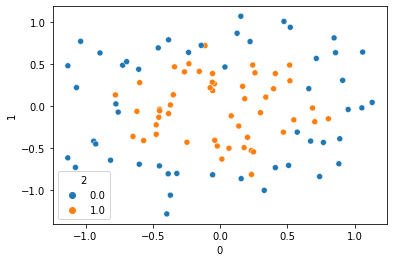

In [8]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(80, 2) (80,)
(20, 2) (20,)


In [10]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Rescaling X test and X_train

In [11]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(x_train)
x_testf=std.transform(x_test)
pd.DataFrame(x_trainf).head()

,0,1
0,0.409950,-1.076843
1,1.520448,0.576395
2,-0.776743,1.326279
3,1.342701,-0.311724
4,1.413636,1.557543


# Sigmoid Activation Fn sgd optimizer

In [40]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=2))

model.add(Dense(2,activation="sigmoid"))

model.add(Dense(1,activation="sigmoid"))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 dense_10 (Dense)            (None, 2)                 8         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


#We are using Stochastic Gradient Descent
And output variable is binary, so we use Binary_cross entropy loss fn.

In [42]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [47]:
history=model.fit(x_trainf,y_train,batch_size=20,epochs=20,validation_split=0.2)

Epoch 1/20
4/4 [==============================] - 0s 36ms/step - loss: 0.6936 - accuracy: 0.5156 - val_loss: 0.6958 - val_accuracy: 0.3750
Epoch 2/20
4/4 [==============================] - 0s 19ms/step - loss: 0.6937 - accuracy: 0.5156 - val_loss: 0.6962 - val_accuracy: 0.3750
Epoch 3/20
4/4 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.5156 - val_loss: 0.6967 - val_accuracy: 0.3750
Epoch 4/20
4/4 [==============================] - 0s 18ms/step - loss: 0.6937 - accuracy: 0.5156 - val_loss: 0.6972 - val_accuracy: 0.3750
Epoch 5/20
4/4 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 0.5156 - val_loss: 0.6976 - val_accuracy: 0.3750
Epoch 6/20
4/4 [==============================] - 0s 18ms/step - loss: 0.6937 - accuracy: 0.5156 - val_loss: 0.6969 - val_accuracy: 0.3750
Epoch 7/20
4/4 [==============================] - 0s 18ms/step - loss: 0.6936 - accuracy: 0.5156 - val_loss: 0.6974 - val_accuracy: 0.3750
Epoch 8/20
4/4 [===========

In [48]:
y_pred=model.predict(x_testf)

if y_pred is greater than 0.5 we make it 1 else 0

In [49]:
y_predf=np.where(y_pred>0.5,1,0)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.55

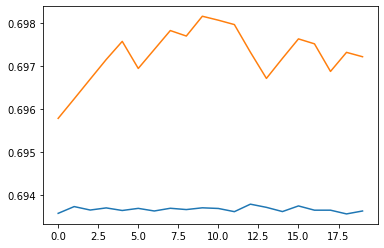

In [51]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [52]:
pip install mlxtend

^C
Note: you may need to restart the kernel to use updated packages.


In [154]:
import mlxtend

In [53]:
from mlxtend.plotting import plot_decision_regions

C:\Users\kusumitha\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

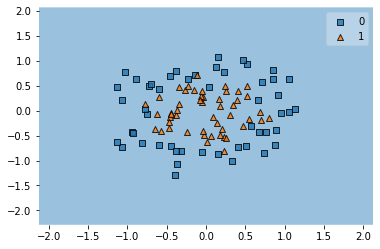

In [54]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

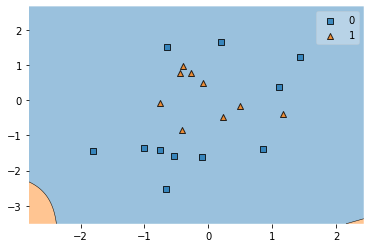

In [55]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Sigmoid Fn with optimizer adam

In [66]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=2))

model.add(Dense(3,activation="sigmoid"))

model.add(Dense(1,activation="sigmoid"))

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 3)                 9         
                                                                 
 dense_16 (Dense)            (None, 3)                 12        
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [74]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=40,validation_split=0.2)

Epoch 1/40
7/7 [==============================] - 0s 19ms/step - loss: 0.6951 - accuracy: 0.5625 - val_loss: 0.6783 - val_accuracy: 0.7500
Epoch 2/40
7/7 [==============================] - 0s 11ms/step - loss: 0.6949 - accuracy: 0.5781 - val_loss: 0.6790 - val_accuracy: 0.8125
Epoch 3/40
7/7 [==============================] - 0s 10ms/step - loss: 0.6949 - accuracy: 0.5625 - val_loss: 0.6797 - val_accuracy: 0.8125
Epoch 4/40
7/7 [==============================] - 0s 11ms/step - loss: 0.6945 - accuracy: 0.5469 - val_loss: 0.6798 - val_accuracy: 0.8125
Epoch 5/40
7/7 [==============================] - 0s 11ms/step - loss: 0.6945 - accuracy: 0.5469 - val_loss: 0.6805 - val_accuracy: 0.8125
Epoch 6/40
7/7 [==============================] - 0s 11ms/step - loss: 0.6942 - accuracy: 0.5625 - val_loss: 0.6810 - val_accuracy: 0.8125
Epoch 7/40
7/7 [==============================] - 0s 10ms/step - loss: 0.6943 - accuracy: 0.5625 - val_loss: 0.6821 - val_accuracy: 0.8125
Epoch 8/40
7/7 [===========

In [75]:
y_pred=model.predict(x_testf)

In [76]:
y_predf=np.where(y_pred>0.5,1,0)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.45

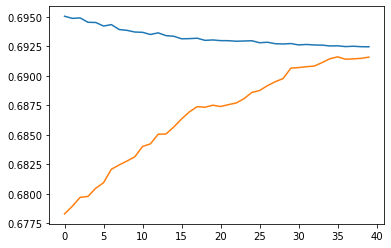

In [78]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

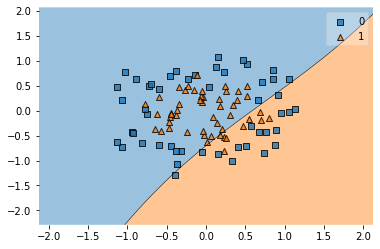

In [79]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

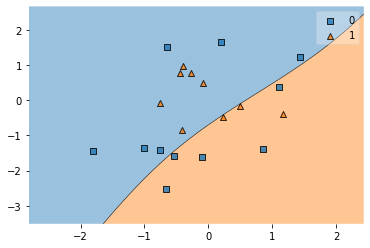

In [80]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Tanh Act Fn with sgd optimizer

In [81]:
model=Sequential()
model.add(Dense(3,activation="tanh",input_dim=2))

model.add(Dense(4,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

In [82]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 3)                 9         
                                                                 
 dense_19 (Dense)            (None, 4)                 16        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [93]:
history=model.fit(x_trainf,y_train,batch_size=30,epochs=20,validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 0s 51ms/step - loss: 0.7063 - accuracy: 0.5469 - val_loss: 0.7981 - val_accuracy: 0.3125
Epoch 2/20
3/3 [==============================] - 0s 26ms/step - loss: 0.7058 - accuracy: 0.5625 - val_loss: 0.7957 - val_accuracy: 0.3125
Epoch 3/20
3/3 [==============================] - 0s 34ms/step - loss: 0.7046 - accuracy: 0.5469 - val_loss: 0.7906 - val_accuracy: 0.3125
Epoch 4/20
3/3 [==============================] - 0s 33ms/step - loss: 0.7041 - accuracy: 0.5625 - val_loss: 0.7885 - val_accuracy: 0.3125
Epoch 5/20
3/3 [==============================] - 0s 33ms/step - loss: 0.7039 - accuracy: 0.5625 - val_loss: 0.7862 - val_accuracy: 0.3125
Epoch 6/20
3/3 [==============================] - 0s 34ms/step - loss: 0.7033 - accuracy: 0.5625 - val_loss: 0.7843 - val_accuracy: 0.3125
Epoch 7/20
3/3 [==============================] - 0s 34ms/step - loss: 0.7031 - accuracy: 0.5625 - val_loss: 0.7823 - val_accuracy: 0.3125
Epoch 8/20
3/3 [===========

In [94]:
y_pred=model.predict(x_testf)

In [95]:
y_predf=np.where(y_pred>0.5,1,0)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.6

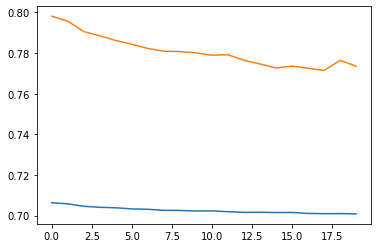

In [97]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

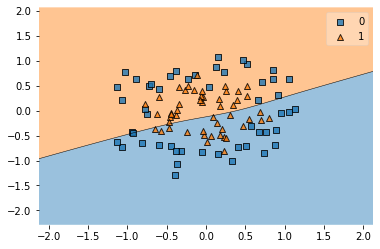

In [98]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

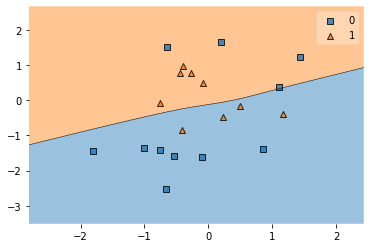

In [99]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Tanh Act Fn with adam optimizer

In [100]:
model=Sequential()
model.add(Dense(3,activation="tanh",input_dim=2))

model.add(Dense(4,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

In [101]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 3)                 9         
                                                                 
 dense_22 (Dense)            (None, 4)                 16        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [103]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20
7/7 [==============================] - 1s 48ms/step - loss: 0.7633 - accuracy: 0.5000 - val_loss: 0.5597 - val_accuracy: 0.6875
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 0.7570 - accuracy: 0.5000 - val_loss: 0.5647 - val_accuracy: 0.6875
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 0.7508 - accuracy: 0.5000 - val_loss: 0.5696 - val_accuracy: 0.6875
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 0.7447 - accuracy: 0.5000 - val_loss: 0.5733 - val_accuracy: 0.6875
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.7404 - accuracy: 0.5000 - val_loss: 0.5788 - val_accuracy: 0.6875
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 0.7355 - accuracy: 0.5000 - val_loss: 0.5833 - val_accuracy: 0.6875
Epoch 7/20
7/7 [==============================] - 0s 13ms/step - loss: 0.7307 - accuracy: 0.5000 - val_loss: 0.5873 - val_accuracy: 0.6875
Epoch 8/20
7/7 [===========

In [104]:
y_pred=model.predict(x_testf)

In [105]:
y_predf=np.where(y_pred>0.5,1,0)

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.35

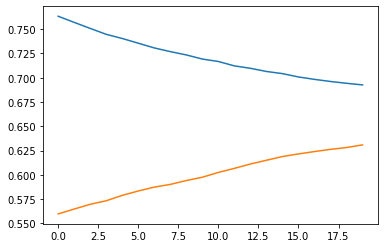

In [107]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

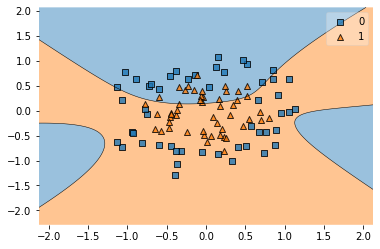

In [108]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

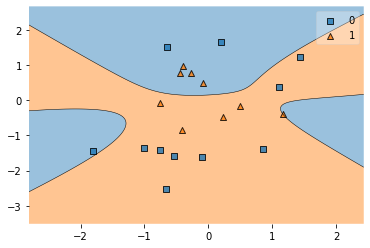

In [109]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Relu Act Fn with sgd optimizer

In [134]:
model=Sequential()
model.add(Dense(3,activation="relu",input_dim=2))

model.add(Dense(2,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [135]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 3)                 9         
                                                                 
 dense_34 (Dense)            (None, 2)                 8         
                                                                 
 dense_35 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [137]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=30,validation_split=0.2)

Epoch 1/30
7/7 [==============================] - 1s 49ms/step - loss: 0.7076 - accuracy: 0.5625 - val_loss: 0.6735 - val_accuracy: 0.5625
Epoch 2/30
7/7 [==============================] - 0s 10ms/step - loss: 0.6986 - accuracy: 0.5625 - val_loss: 0.6615 - val_accuracy: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 11ms/step - loss: 0.6912 - accuracy: 0.5781 - val_loss: 0.6537 - val_accuracy: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 11ms/step - loss: 0.6856 - accuracy: 0.5781 - val_loss: 0.6466 - val_accuracy: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 10ms/step - loss: 0.6811 - accuracy: 0.5781 - val_loss: 0.6419 - val_accuracy: 0.6875
Epoch 6/30
7/7 [==============================] - 0s 11ms/step - loss: 0.6781 - accuracy: 0.5781 - val_loss: 0.6354 - val_accuracy: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 10ms/step - loss: 0.6739 - accuracy: 0.5469 - val_loss: 0.6308 - val_accuracy: 0.6875
Epoch 8/30
7/7 [===========

In [138]:
y_pred=model.predict(x_testf)

In [139]:
y_predf=np.where(y_pred>0.5,1,0)

In [140]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.7

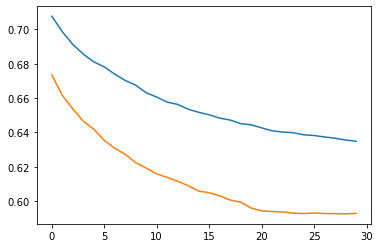

In [141]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

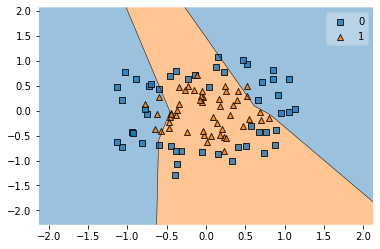

In [142]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

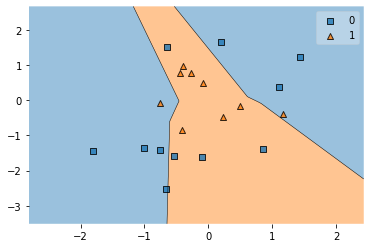

In [143]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Relu Act Fn with adam optimizer

In [124]:
model=Sequential()
model.add(Dense(3,activation="relu",input_dim=2))

model.add(Dense(4,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [125]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 3)                 9         
                                                                 
 dense_31 (Dense)            (None, 4)                 16        
                                                                 
 dense_32 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [127]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20
7/7 [==============================] - 1s 51ms/step - loss: 0.7875 - accuracy: 0.4844 - val_loss: 0.6232 - val_accuracy: 0.6250
Epoch 2/20
7/7 [==============================] - 0s 12ms/step - loss: 0.7787 - accuracy: 0.4844 - val_loss: 0.6297 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.7705 - accuracy: 0.4844 - val_loss: 0.6362 - val_accuracy: 0.6250
Epoch 4/20
7/7 [==============================] - 0s 13ms/step - loss: 0.7622 - accuracy: 0.4844 - val_loss: 0.6422 - val_accuracy: 0.6250
Epoch 5/20
7/7 [==============================] - 0s 11ms/step - loss: 0.7565 - accuracy: 0.4844 - val_loss: 0.6486 - val_accuracy: 0.5625
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.7487 - accuracy: 0.4688 - val_loss: 0.6531 - val_accuracy: 0.5625
Epoch 7/20
7/7 [==============================] - 0s 12ms/step - loss: 0.7443 - accuracy: 0.4688 - val_loss: 0.6586 - val_accuracy: 0.4375
Epoch 8/20
7/7 [===========

In [128]:
y_pred=model.predict(x_testf)

In [129]:
y_predf=np.where(y_pred>0.5,1,0)

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.35

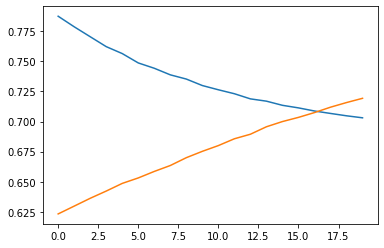

In [131]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

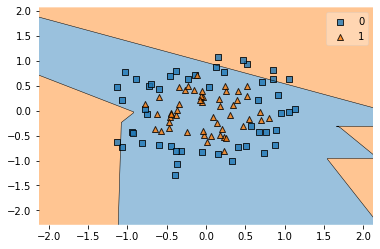

In [132]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

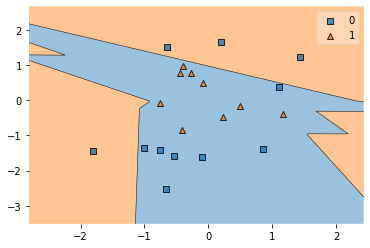

In [133]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Conclusion

### For this Dataset "concerticcir1" Relu Activation Function with sgd optimizer is working well and with sigmoid Activation Functions model is trained very well We can use both